In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#cd /content/drive/MyDrive/My_Projects/app

#cd /content/drive/MyDrive/Cours IA - Hiver 2023/Deployment/Image-Classification-Webapp

In [3]:
# %tensorflow_version 1.x

In [4]:
import tensorflow
print(tensorflow.__version__)

2.12.0


#Data Preprocessing

In [5]:
import cv2,os
#data_path='/content/drive/MyDrive/Cours IA - Hiver 2023/Deployment/Image-Classification-Webapp/Dataset'

data_path='/content/drive/MyDrive/Cours IA - Hiver 2023/Cours-5 : Technologies et Applications en Apprentissage Profond (DML) - Partie 1/Dataset/chien_chats/train'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'chat': 0, 'chien': 1}
['chat', 'chien']
[0, 1]


In [6]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Exception: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [7]:
# target

In [8]:
data

[array([[[ 16,  34,  27],
         [ 14,  30,  23],
         [ 17,  31,  25],
         ...,
         [ 27,  42,  28],
         [ 29,  44,  30],
         [ 27,  42,  28]],
 
        [[ 10,  28,  21],
         [ 15,  31,  24],
         [ 15,  29,  23],
         ...,
         [ 17,  34,  20],
         [ 17,  33,  19],
         [ 19,  34,  22]],
 
        [[ 13,  31,  24],
         [ 14,  30,  23],
         [ 14,  28,  22],
         ...,
         [ 28,  32,  20],
         [ 28,  32,  20],
         [ 27,  33,  16]],
 
        ...,
 
        [[218, 218, 230],
         [217, 217, 229],
         [219, 219, 231],
         ...,
         [224, 222, 228],
         [223, 222, 226],
         [216, 214, 220]],
 
        [[213, 213, 225],
         [215, 215, 227],
         [217, 217, 229],
         ...,
         [223, 221, 227],
         [220, 219, 223],
         [217, 215, 221]],
 
        [[218, 218, 230],
         [213, 217, 228],
         [208, 214, 225],
         ...,
         [222, 220, 226],
  

#Recale and assign  catagorical lables

In [9]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [10]:
new_target.shape

(8005, 2)

In [11]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
data

array([[[[0.0627451 , 0.13333333, 0.10588235],
         [0.05490196, 0.11764706, 0.09019608],
         [0.06666667, 0.12156863, 0.09803922],
         ...,
         [0.10588235, 0.16470588, 0.10980392],
         [0.11372549, 0.17254902, 0.11764706],
         [0.10588235, 0.16470588, 0.10980392]],

        [[0.03921569, 0.10980392, 0.08235294],
         [0.05882353, 0.12156863, 0.09411765],
         [0.05882353, 0.11372549, 0.09019608],
         ...,
         [0.06666667, 0.13333333, 0.07843137],
         [0.06666667, 0.12941176, 0.0745098 ],
         [0.0745098 , 0.13333333, 0.08627451]],

        [[0.05098039, 0.12156863, 0.09411765],
         [0.05490196, 0.11764706, 0.09019608],
         [0.05490196, 0.10980392, 0.08627451],
         ...,
         [0.10980392, 0.1254902 , 0.07843137],
         [0.10980392, 0.1254902 , 0.07843137],
         [0.10588235, 0.12941176, 0.0627451 ]],

        ...,

        [[0.85490196, 0.85490196, 0.90196078],
         [0.85098039, 0.85098039, 0.89803922]

#CNN Model

In [13]:
data.shape

(8005, 100, 100, 3)

In [14]:
data.shape[1:]

(100, 100, 3)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

#Splittiong data into traning and testing

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.4)

In [18]:
train_data.shape

(4803, 100, 100, 3)

In [19]:
train_target.shape

(4803, 2)

In [20]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
121/121 [==============================] - 18s 47ms/step - loss: 0.6963 - accuracy: 0.5403 - val_loss: 0.6878 - val_accuracy: 0.5432
Epoch 2/200
121/121 [==============================] - 4s 35ms/step - loss: 0.6857 - accuracy: 0.5523 - val_loss: 0.6853 - val_accuracy: 0.5473
Epoch 3/200
121/121 [==============================] - 4s 34ms/step - loss: 0.6779 - accuracy: 0.5630 - val_loss: 0.6815 - val_accuracy: 0.5578
Epoch 4/200
121/121 [==============================] - 4s 37ms/step - loss: 0.6796 - accuracy: 0.5724 - val_loss: 0.6855 - val_accuracy: 0.5515
Epoch 5/200
121/121 [==============================] - 4s 35ms/step - loss: 0.6732 - accuracy: 0.5770 - val_loss: 0.6630 - val_accuracy: 0.6056
Epoch 6/200
121/121 [==============================] - 4s 35ms/step - loss: 0.6521 - accuracy: 0.6163 - val_loss: 0.6742 - val_accuracy: 0.5754
Epoch 7/200
121/121 [==============================] - 5s 39ms/step - loss: 0.6326 - accuracy: 0.6366 - val_loss: 0.6438 - val_accuracy

In [21]:
model.save('model_chien_vs_chat_2.h5')

In [22]:
from matplotlib import pyplot as plt

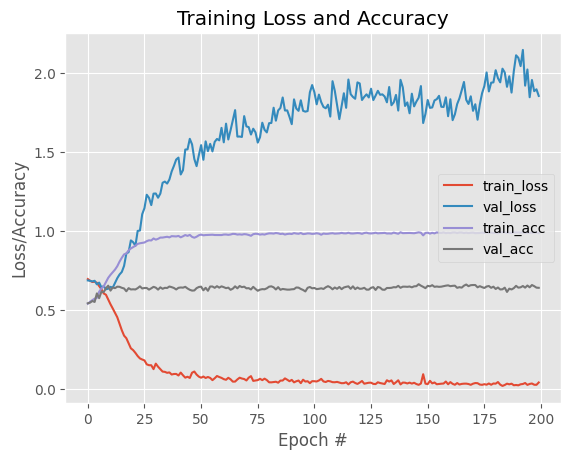

In [23]:
# plot the training loss and accuracy
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")